In [3]:
from sympy import *
from sympy.plotting import (plot, plot_parametric)

ABSOLUTE AND LOCAL EXTREMA IN PYTHON

Recall that a function has a local extremum (maximum or minimum) at a critical value (a point where the derivative is zero OR does not exist).  A function can have a global extremum (maximum or minimum) at a critical value or the endpoint of its domain.

NOTE: The example here (and in future overviews) is NOT a copy/paste to solve the problems in lab.  However, it will USE many of the features you will use to solve your problems, such as (in this case) differentiating vector functions, finding angles of tangent vectors, finding slopes and equations of tangent lines, and plotting.

EXAMPLE: 

Given the function sqrt(t+1)/(1+t^2):

a) Find the domain of the function.

b) Find the critical values.

c) Plot the function to determine which critical values are local maxima and which are local minima (include both x and y values)

d) Find the absolute maximum and absolute minimum on its domain.

e) Find the absolute maximum and absolute minimum on the closed interval [0, 2].

Recall the process for solving calculus problems in Python: list the steps required to solve the problem by hand, then list the command(s) needed to perform each step in Python.  

For part a) the process is as follows:

1)  Find where the denominator is zero (**solve**)

2)  Find where anything inside of even roots are nonnegative and anything inside of logarithms are positive (inequalities can be solved in Python using the command **reduce_inequalities**).

In this example, both of these are easy to determine by hand, so not necessary to do in Python. We will still show how to use Python in the event that were not the case:

In [4]:
t=symbols('t', real=True) #this will be helpful when solving
denom=1+t**2
numer=sqrt(t+1)
# Step 1
zerodenom=solve(denom,t)
print('The denominator is zero when t is',zerodenom)
print('Which means never.')
# Step 2: square root only in this example
domain=reduce_inequalities(t+1>=0)
print('The domain is',domain,'or [-1,oo)')

The denominator is zero when t is []
Which means never.
The domain is -1 <= t or [-1,oo)


The steps to solve part b are:

1)  Find the derivative (**diff**)

2)  Set the derivative equal to zero (**solve**), noting any places where the derivative DNE as well

In [5]:
f=numer/denom
# Step 1 
df=diff(f,t)
print("f'(t) =",df)  #Note the double-quotes since we use a single quote in the text
print("Or simplified,",df.simplify())

f'(t) = -2*t*sqrt(t + 1)/(t**2 + 1)**2 + 1/(2*sqrt(t + 1)*(t**2 + 1))
Or simplified, (t**2 - 4*t*(t + 1) + 1)/(2*sqrt(t + 1)*(t**2 + 1)**2)


In [6]:
# Step 2
cvals=solve(df,t)
print(cvals) #We ran this line first to see there are two critical values...or are there?
cvals_float=[i.evalf() for i in cvals] # convert each to decimal
print(cvals_float)
# Notice that the second solution is OUTSIDE THE DOMAIN! Remember you can also get extraneous solutions 
# by hand when solving equations with radicals in them (simple example: sqrt(x+2) = x)

[-2/3 + sqrt(7)/3, -sqrt(7)/3 - 2/3]
[0.215250437021530, -1.54858377035486]


Steps for part c):

1)  Plot the function (**plot**)

2)  Determine by inspection whether critical value is a maximum or minimium

3)  Substitute into the ORIGINAL FUNCTION to find the y-value (**subs**)

As always, in Jupyter we run the next line to tell Python to put the graph in the Jupyter notebook.

In [7]:
#matplotlib notebook

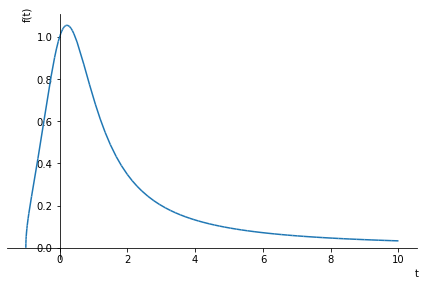

From the graph, [-2/3 + sqrt(7)/3, sqrt(1/3 + sqrt(7)/3)/((-2/3 + sqrt(7)/3)**2 + 1)] is a local maximum.
Or as decimal approximations, [0.215250437021530, 1.05356921903375]


In [8]:
# Step 1 Remember to start at x=-1.  The 10 was arbitrarily chosen
fplot=plot(f,(t,-1,10))
# Step 2  Rather than retyping the value, we choose the ZEROth element of the list
lmax_x=cvals[0]
# Step 3
lmax_y=f.subs(t,lmax_x)
print('From the graph,',[lmax_x,lmax_y],'is a local maximum.')
print('Or as decimal approximations,',[lmax_x.evalf(),lmax_y.evalf()])

Steps to solve part (d) by hand (NOTE that it is obvious from the graph, but it may not always be! Plus you won't have graphing tools on the exam):
  1. NOTE that since we do NOT have a closed, bounded interval, we are not guaranteed an absolute max and min!
  
  2. Find the y-values at the critical value and included endpoint (**subs**, list comprehension can also help do all at once)
  
  3. Find the limit of the function at the open endpoint (infinity in this case:  **limit**)
  
  4. If the limit is the largest (or smallest), there is NO absolute maximum (or minimum).  Otherwise, the largest and smallest answers in #2 are the winners. (**print** results)

In [7]:
# Step 2: get the list of candidates first to do list comprehension
maxmincandidates=[-1,lmax_x] 
yvals=[f.subs(t,i).evalf() for i in maxmincandidates]  #coverting to decimal to make it obvious
print('y-values are',yvals)
# Step 3
print('limit to infinity is',limit(f,t,oo))  #executed these lines first, then finished
# Step 4
print('The absolute maximum is',yvals[1],'at x=',lmax_x)
print('The absolute minimum is',yvals[0],'at x=-1')

y-values are [0, 1.05356921903375]
limit to infinity is 0
The absolute maximum is 1.05356921903375 at x= -2/3 + sqrt(7)/3
The absolute minimum is 0 at x=-1


Part (e) is the same, but since we have a continous function on a closed, bounded interval, we can just do step 2-none of the other steps apply.

In [8]:
# Step 2: create the list of candidates and substitute using list comprehension
maxmincandidates=[0,lmax_x,2] 
yvals=[f.subs(t,i).evalf() for i in maxmincandidates]  #coverting to decimal to make it obvious
print('y-values are',yvals)
print('The absolute maximum is',yvals[1],'at x=',lmax_x)
print('The absolute minimum is',yvals[2],'at x=2')

y-values are [1.00000000000000, 1.05356921903375, 0.346410161513775]
The absolute maximum is 1.05356921903375 at x= -2/3 + sqrt(7)/3
The absolute minimum is 0.346410161513775 at x=2
